In [1]:
%matplotlib inline

In [2]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
import urllib2 as url
import re
import numpy as np

species = [
          # 'macaque',  
           'galago',
           'slow_loris', 
           'douroucouli', 
           'capuchin', 
           'mangabey', 
           'ce_macaque', 
           'baboon',     
           'orangutan', 
           'gorilla', 
           'roberto',
          ]

nt_species = []
nv_species = []
S_species = []
V_species = []
F_species = []


for specie in species: 
    mesh_url="file:///Users/ghfc/Documents/Dropbox/hugo_is_dead/scripts/BrainCatalogueWorkflow/meshes_centered/%s/both.ply" % (specie)
    response=url.urlopen(mesh_url)
    text=response.read()
    text=text.split("\n")

    parser=re.compile("\d+")
    for line in text:
        if "element vertex" in line:
            nv=int(parser.findall(line)[0])
        if "element face" in line:
            nt=int(parser.findall(line)[0])
        if "end_header" in line:
            off=text.index(line)+1
            break
    nt_species.append(nt)
    nv_species.append(nv)

    p=np.array([])
    for i in range(off,off+nv):
        p=np.concatenate([p,np.fromstring(text[i],dtype=float,sep=" ")])
    p=p.reshape(nv,3)


    t=np.array([])
    for i in range(off+nv,off+nv+nt):
        tr=np.fromstring(text[i],dtype=int,sep=" ");
        t=np.concatenate([t,[tr[1],tr[2],tr[3]]])
    t=t.reshape(nt,3)
    
# Surface area
    def A(p0,p1,p2):
        #a,b,c    // side lengths
        #s        // semiperimeter
        a=np.linalg.norm(p0-p1);
        b=np.linalg.norm(p1-p2);
        c=np.linalg.norm(p2-p0);
        s=(a+b+c)/2.0;
        return np.sqrt(s*(s-a)*(s-b)*(s-c))

    S=0
    for i in range(0,nt):
        S+=A(p[t[i][0]],p[t[i][1]],p[t[i][2]])
    S_species.append(S)    

#Volume
    # Based on code by S. Melax from http://www.melax.com/volint/
    def volume(p0,p1,p2):
        return np.linalg.det([p0,p1,p2])/6.0

    V=0
    for i in range(0,nt):
        V+=volume(p[t[i][0]],p[t[i][1]],p[t[i][2]])
    V_species.append(V)
    
    print "Specie",specie
    print "Reading",nv,"vertices and",nt,"triangles." 
    print "Surface area:",S,"Volume:",V

#absolute folding index
    def absFolding(s,v):
        return s/(v**(2/3.0)*(36.0*np.pi)**(1/3.0))
    #print absFolding(4*np.pi,(4/3.0)*np.pi) #test for a sphere

    F=absFolding(S,V)
    F_species.append(F)
    print "Absolute folding:",F
    
    #check the size of the brain
    Xmin = p[0, 0]
    Xmax = p[0, 0]

    for i in range(0, nv):
        if p[i, 0] < Xmin:
            Xmin = p[i, 0]
        if p[i, 0] > Xmax:
            Xmax = p[i, 0]

    Ymin = p[0, 1]
    Ymax = p[0, 1]
    for i in range(0, nv):
        if p[i, 1] < Ymin:
            Ymin = p[i, 1]
        if p[i, 1] > Ymax:
            Ymax = p[i, 1]

    Zmin = p[0, 2]
    Zmax = p[0, 2]
    for i in range(0, nv):
        if p[i, 1] < Zmin:
            Zmin = p[i, 2]
        if p[i, 1] > Zmax:
            Zmax = p[i, 2]

    print "X:", (Xmax-Xmin), "Y:", (Ymax - Ymin), "Z:", (Zmax - Zmin)





/Users/ghfc/anaconda2/envs/julia/lib/python2.7/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda2/envs/julia/lib/python2.7/site-packages/ipykernel/__main__.py:78: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Specie galago
Reading 5002 vertices and 10000 triangles.
Surface area: 1235.84982314 Volume: 1817.66675399
Absolute folding: 1.71582134445
X: 18.774 Y: 22.514 Z: 4.302001
Specie slow_loris
Reading 6856 vertices and 13708 triangles.
Surface area: 2049.39564515 Volume: 4037.4054265
Absolute folding: 1.67137323399
X: 24.022978 Y: 26.849528 Z: -2.579356
Specie douroucouli
Reading 9968 vertices and 19932 triangles.
Surface area: 4654.29184354 Volume: 11670.1904087
Absolute folding: 1.87061405337
X: 30.168002 Y: 44.477998 Z: -5.136498
Specie capuchin
Reading 12560 vertices and 25116 triangles.
Surface area: 12750.2018512 Volume: 38854.3544175
Absolute folding: 2.29829869701
X: 44.395132 Y: 61.886772 Z: -13.816194
Specie mangabey
Reading 19939 vertices and 39874 triangles.
Surface area: 18887.6827766 Volume: 49183.4784169
Absolute folding: 2.90947789585
X: 52.93531 Y: 62.470392 Z: 5.810457
Specie ce_macaque
Reading 10997 vertices and 21990 triangles.
Surface area: 20350.6225784 Volume: 58037.

slope = 0.805273918171


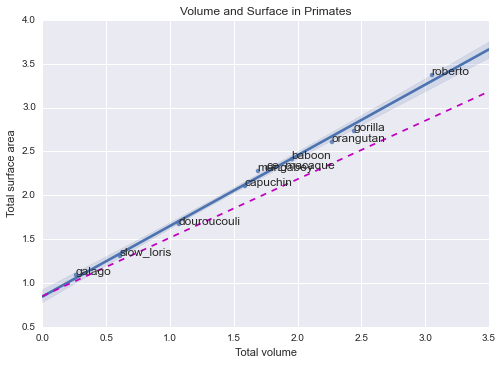

In [197]:
# plot data 
x = np.asarray(V_species)/1000 #convert to cm3
y = np.asarray(S_species)/100 #convert to cm2

## now for log10
for index, item in enumerate(y):
    y[index] = math.log10(item)
for index, item in enumerate(x):
    x[index] = math.log10(item)
    
    


fig = plt.figure()
ax = fig.add_subplot(111)

sns.regplot(x,y)
plt.title("Volume and Surface in Primates")
plt.xlabel('Total volume')
plt.ylabel('Total surface area')
slope, intercept= np.polyfit(x,y,1)
print('slope = ' + str(slope))
#plt.ylim([0,3000])
#plt.xlim([0,1200])


for i in range(9):
    for xy in zip(x, y):
        ax.annotate('%s' % (species[i]), xy=xy)
        i=i+1
    break


# 2/3 slope
x1 = np.arange(0, 4, step=0.1)
y1 = (2./3.)*x1 + 0.85
a, b= np.polyfit(x1,y1,1)
plt.plot(x1, a*x1 + b, 'm--')
plt.savefig('allometry.png') #update with your path
plt.show()